In [1]:
# Add the path to the slack-pack/code/ folder in order to be able to import nlp module
import sys, os

NLP_PATH = '/'.join(os.path.abspath('.').split('/')[:-1]) + '/'
sys.path.append(NLP_PATH)

### Visualizing Topics

In [2]:
%matplotlib inline
import cPickle as pk

#### Loading a saved window

In [3]:
with open('../nlp/data/windows/tech_stuff_30m.pk', 'rb') as f:
    WINDOW = pk.load(f)

In [4]:
WINDOW.report_topics()

Window has #7 topics

Topic length report:
  Topic # 0  --> size: 10 
  Topic # 1  --> size: 6  
  Topic # 2  --> size: 1  
  Topic # 3  --> size: 10 
  Topic # 4  --> size: 2  
  Topic # 5  --> size: 1  
  Topic # 6  --> size: 1  


First let's generate the corpus from which we will build all the visualizations.

In [5]:
from nlp.text.corpus import Corpus, from_window
from nlp.grammar.tokenizer import SimpleCleaner

In [6]:
corpus = from_window(WINDOW, cleaner=SimpleCleaner())

Perfect, now let's get a-viz-ing!



### Wordcloud

In [7]:
from nlp.models.summarization import TFIDF
from nlp.viz.cloud import Wordcloud

In [8]:
model = TFIDF(corpus=corpus, dictionary=corpus.dictionary)

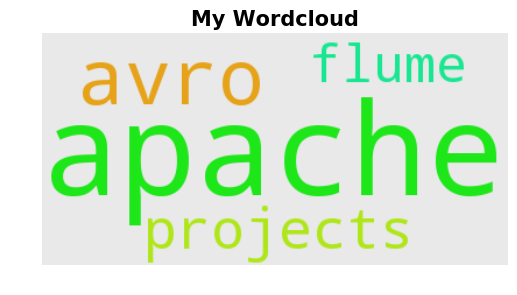

In [9]:
wordcloud = Wordcloud(model, corpus[2], words_show=10)  # defaults to 10 words
wordcloud.show('My Wordcloud')

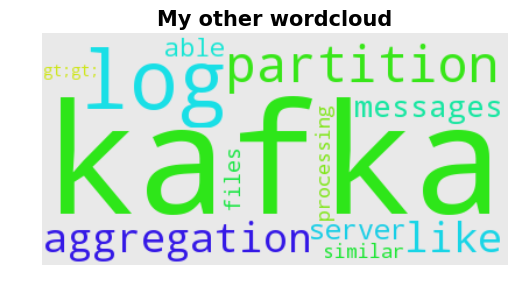

In [13]:
wordcloud = Wordcloud(model, corpus[3], words_show=12)
wordcloud.show('My other wordcloud')